# **Project Name**    -  Obesity Level Classification



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Shivam Dubey (2210992308)
##### **Team Member 2 -** Shivam Sharma (2210992317)
##### **Team Member 3 -** Shivansh Dutta (2210992320)
##### **Team Member 4 -** Shivansh Garg (2210992321)

# **Project Summary -**

**Introduction**:
Obesity has become a global health concern with its rising prevalence and associated health risks. Addressing this issue requires effective identification and classification of obesity levels to tailor interventions and treatments. In this project, we employ machine learning techniques to classify obesity levels based on various factors such as demographic data, lifestyle habits, and medical history.

**Objective**:
The main objective of this project is to develop a classification model that accurately predicts the obesity level of individuals based on their attributes. We aim to explore the effectiveness of three popular machine learning algorithms: Logistic Regression, Decision Trees, and Support Vector Machines (SVM) in addressing this classification task.

**Data Collection and Preprocessing**:
We gather data from diverse sources including surveys, medical records, and lifestyle questionnaires. The dataset includes features such as age, gender, BMI (Body Mass Index), eating habits, physical activity level, and medical history. Data preprocessing involves handling missing values, encoding categorical variables, and scaling numerical features to ensure compatibility with machine learning algorithms.

**Model Development**:
We train three machine learning models: Logistic Regression, Decision Trees, and SVM, using the preprocessed dataset. Each model learns the patterns and relationships within the data to classify individuals into different obesity levels, such as underweight, normal weight, overweight, and obese. We fine-tune hyperparameters and optimize model performance using techniques like cross-validation.

**Evaluation Metrics**:
To evaluate the performance of each model, we employ various classification metrics such as accuracy, precision, recall, F1-score, and confusion matrix. These metrics provide insights into the model's ability to correctly classify obesity levels and identify any potential biases or limitations.

**Results and Discussion**:
We compare the performance of the three machine learning models based on their evaluation metrics. Through comprehensive analysis, we identify the strengths and weaknesses of each model in accurately classifying obesity levels. Insights gained from this analysis can guide healthcare practitioners and policymakers in developing targeted interventions and preventive measures.

**Conclusion**:
In conclusion, this project demonstrates the application of machine learning techniques in the classification of obesity levels. By leveraging logistic regression, decision trees, and SVM, we provide a comprehensive approach to addressing this critical health issue. Further research and refinement of the models could enhance their accuracy and applicability in real-world healthcare settings.

# **GitHub Link -**

https://github.com/ShivamSharma731?tab=repositories

# **Problem Statement**


Develop a system to classify user health data, including obesity levels, and provide personalized feedback on the user's health group, enabling individuals to understand their health status and take appropriate actions for improved well-being.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as nu
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_csv("dataset.csv")

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
rows,columns = df.shape
print("Number of rows in the dataset : ",rows)
print("Number of columns in the dataset : ",columns)

Number of rows in the dataset :  2111
Number of columns in the dataset :  17


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows in the dataset : ",duplicate_count)

Number of duplicate rows in the dataset :  24


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print("Missing values in the dataset :")
print(missing_values)

Missing values in the dataset :
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


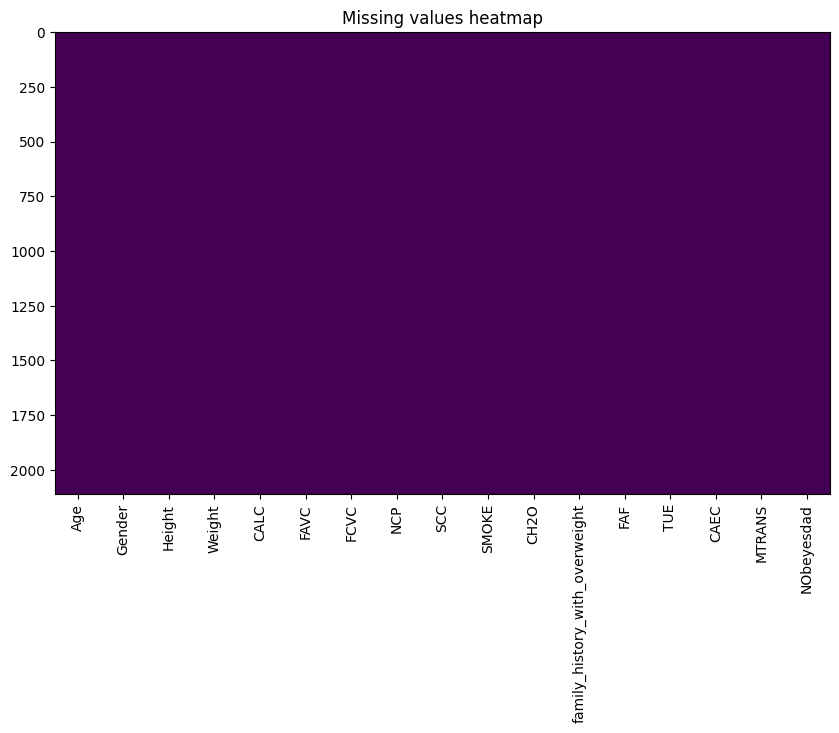

In [9]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
plt.imshow(df.isnull(),cmap='viridis',aspect='auto',interpolation='none')
plt.title('Missing values heatmap')
plt.xticks(range(len(df.columns)),df.columns,rotation=90)
plt.show()

### What did you know about your dataset?

**Data Overview**:
The dataset comprises a collection of health-related attributes recorded from individuals, including demographic information, lifestyle habits, and medical history. It offers insights into factors influencing obesity levels, with features ranging from age and gender to dietary habits, physical activity levels, and transportation preferences.

**Data Content**:
Each row in the dataset represents an individual, with columns corresponding to specific attributes such as age, gender, height, weight, dietary habits, and family history of overweight. The dataset also includes a target variable indicating the obesity level classification for each individual, enabling supervised learning tasks aimed at predicting these classifications based on the provided features.

**Task Nature**:
The task at hand involves developing a machine learning model to classify individuals into different obesity level groups based on their health data. This classification task is crucial for personalized healthcare interventions, as it allows for tailored recommendations and interventions based on an individual's specific health status. The ultimate goal is to provide users with actionable insights regarding their health status and guide them towards adopting healthier lifestyle choices.

**Potential Challenges**:
Several challenges may arise in this project, including data preprocessing complexities such as handling missing values, outliers, and categorical variables. Ensuring the privacy and security of user data throughout the collection and analysis process is another critical challenge. Additionally, building robust machine learning models capable of accurately classifying individuals across diverse demographics and lifestyle profiles requires careful feature selection, model evaluation, and validation. Addressing these challenges effectively is essential for developing a reliable and user-friendly system for obesity level classification and personalized health recommendations.

## ***2. Understanding Your Variables***

# Dataset Columns

The dataset consists of the following columns:

1. Age
2. Gender
3. Height
4. Weight
5. CALC
6. FAVC
7. FCVC
8. NCP
9. SCC
10. SMOKE
11. CH2O
12. family_history_with_overweight
13. FAF
14. TUE
15. CAEC
16. MTRANS
17. NObeyesdad

In [10]:
# Dataset Describe
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Variables Description 

The dataset consists of the following columns:

1. Age: Represents the age of the individual, providing insight into the demographic profile of the dataset.
2. Gender: Indicates the gender of the individual, allowing for gender-specific analysis if applicable.
3. Height: Provides the height of the individual, a crucial anthropometric measure related to body composition.
4. Weight: Specifies the weight of the individual, another key anthropometric measure for assessing obesity and health status.
5. CALC: Likely a calculated feature, possibly related to body composition or metabolic calculations.
6. FAVC: Represents the frequency of consuming high caloric food, offering insights into dietary habits.
7. FCVC: Indicates the frequency of consuming vegetables, reflecting dietary preferences and health-conscious behaviors.
8. NCP: Stands for the Number of Main Meals (NCP), providing information on eating patterns and meal frequency.
9. SCC: Possibly denotes a health-related condition or parameter, requiring further context for interpretation.
10. SMOKE: Indicates the smoking status of the individual, if applicable, influencing health outcomes and risk factors.
11. CH2O: Represents the daily consumption of water, a crucial aspect of hydration and overall health.
12. family_history_with_overweight: Indicates whether the individual has a family history of overweight, providing insights into genetic predispositions.
13. FAF: Stands for the Frequency of Physical Activity, offering insights into the individual's exercise habits and lifestyle.
14. TUE: Represents the Time Spent on Sedentary Activities, reflecting the individual's sedentary behavior.
15. CAEC: Likely denotes the consumption of food between meals (CAEC), providing insights into snacking behaviors and dietary patterns.
16. MTRANS: Indicates the mode of transportation used by the individual, reflecting their daily activity level and lifestyle.
17. NObeyesdad: Represents the obesity level classification for each individual, serving as the target variable for classification tasks

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")
    print("\n")

Unique values for 'Age': [21.       23.       27.       ... 22.524036 24.361936 23.664709]


Unique values for 'Gender': ['Female' 'Male']


Unique values for 'Height': [1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]


Unique values for 'Weight': [ 64.        56.        77.       ... 133.689352 133.346641 133.472641]


Unique values for 'CALC': ['no' 'Sometimes' 'Frequently' 'Always']


Unique values for 'FAVC': ['no' 'yes']


Unique values for 'FCVC': [2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Check data types of columns
print("\nData types of columns:")
print(df.dtypes)

Missing values:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Data types of columns:
Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64

### What all manipulations have you done and insights you found?

We found that our dataset doesn't contain any missing values, and the data types within our dataset are objects and float values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

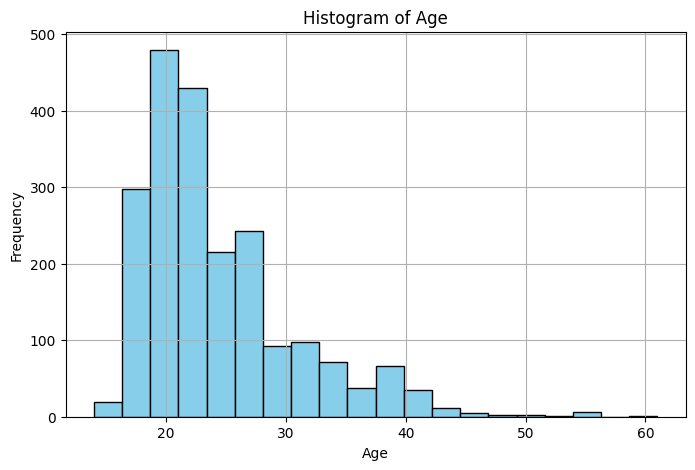

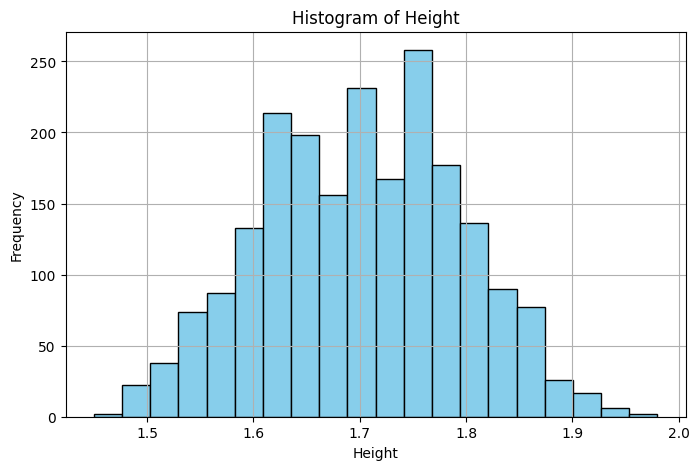

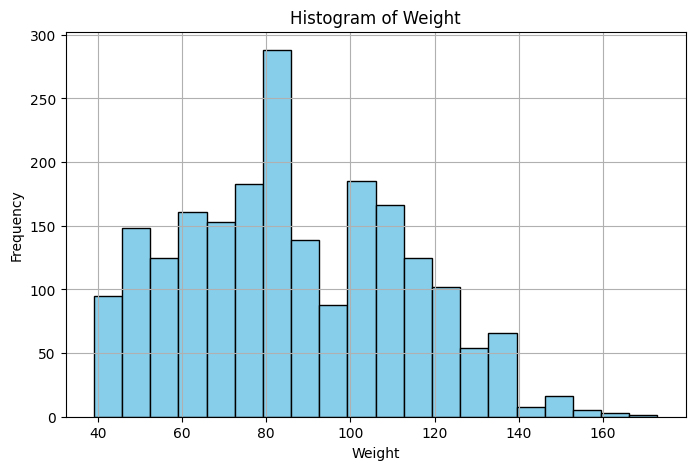

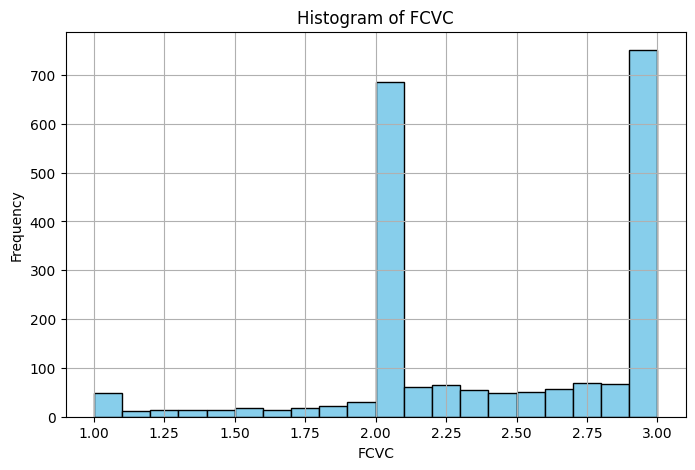

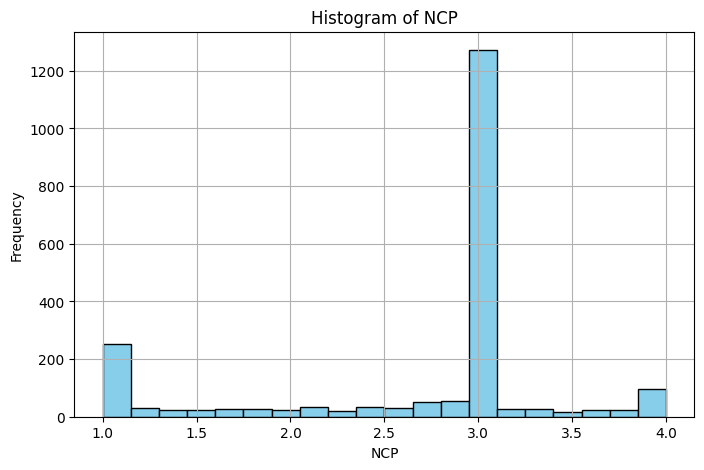

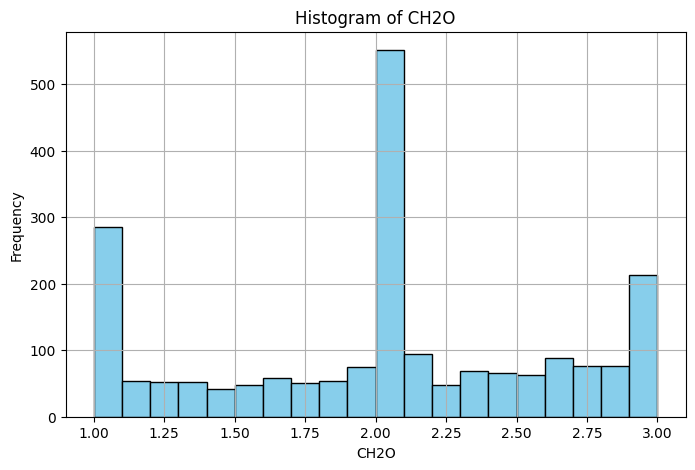

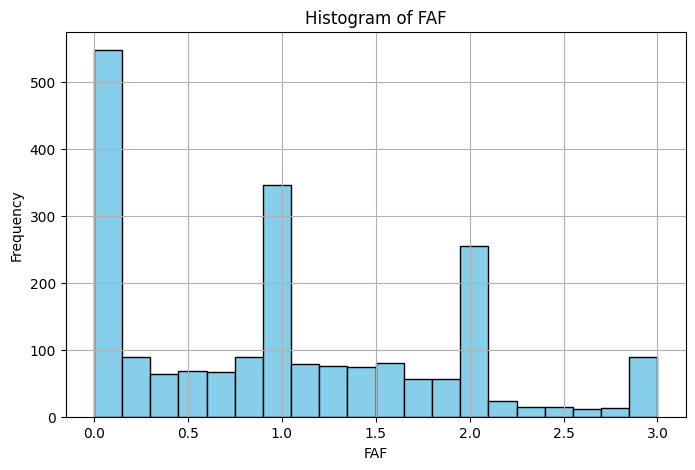

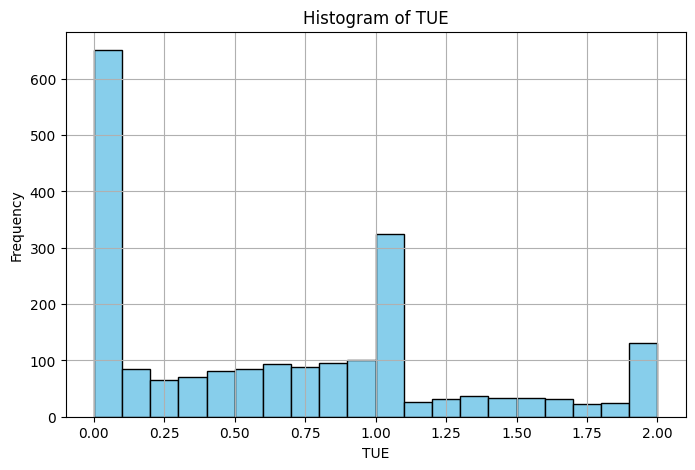

In [13]:
# Chart - 1 [Histogram] visualization code

import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('dataset.csv')

# Select numerical columns
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Create histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

##### 1. Why did you pick the specific chart?

I chose histograms because they offer a concise way to visually represent the distribution of numerical data in my dataset. By examining the shape and spread of each histogram, I can quickly grasp the central tendencies and identify any potential outliers. This visualization method helps me gain insights into the characteristics of variables like age, height, weight, and others, facilitating a deeper understanding of the dataset's underlying patterns.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the histograms reveal the distribution patterns of numerical variables in the dataset. By analyzing the charts, I can observe the central tendencies, spread, and skewness of each variable's distribution. Additionally, any unusual spikes or outliers in the histograms can signify potential anomalies or interesting data points warranting further investigation. These insights provide valuable context for understanding the characteristics of features such as age, height, weight, and others, aiding in subsequent analysis and decision-making processes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the histograms can positively impact business decisions by informing product/service customization and optimization strategies. However, anomalies or outliers in the data may indicate areas of concern, such as data quality issues or biases, potentially leading to negative growth if not addressed promptly. Therefore, careful analysis and action based on these insights are essential for maximizing positive impacts and minimizing risks to business growth.

#### Chart - 2

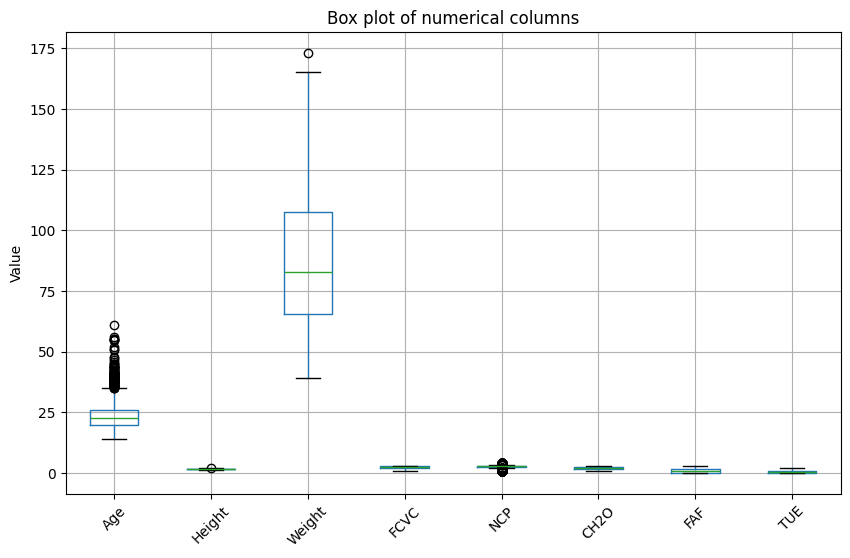

In [14]:
# Chart - 2 [Box Plot] visualization code

import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
df = pd.read_csv('dataset.csv')

# Select numerical columns
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Create a box plot for each numerical column
plt.figure(figsize=(10, 6))
df[numerical_columns].boxplot()
plt.title('Box plot of numerical columns')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?


I chose a box plot because it effectively displays the distribution, central tendency, and variability of numerical data, making it suitable for visualizing multiple numerical variables simultaneously. Box plots also help identify outliers and assess the spread of data, providing valuable insights into the dataset's characteristics. Additionally, box plots are easy to interpret and compare across different variables, facilitating comprehensive data exploration and analysis.

##### 2. What is/are the insight(s) found from the chart?

The box plot reveals the distribution, central tendency, and variability of numerical variables in the dataset. It highlights any outliers and differences in spread among variables, aiding in understanding their characteristics. These insights inform data analysis by identifying potential anomalies and guiding subsequent preprocessing steps for improved data quality and analysis accuracy.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, the gained insights can contribute to a positive business impact by informing data-driven decision-making processes, enabling tailored strategies and product/service optimizations. However, anomalies or outliers indicating data quality issues may lead to negative growth if unaddressed, potentially leading to inaccurate analyses or misguided decisions, impacting customer satisfaction and business performance. Therefore, proactive measures to address such issues are crucial for maintaining positive business outcomes.

#### Chart - 3

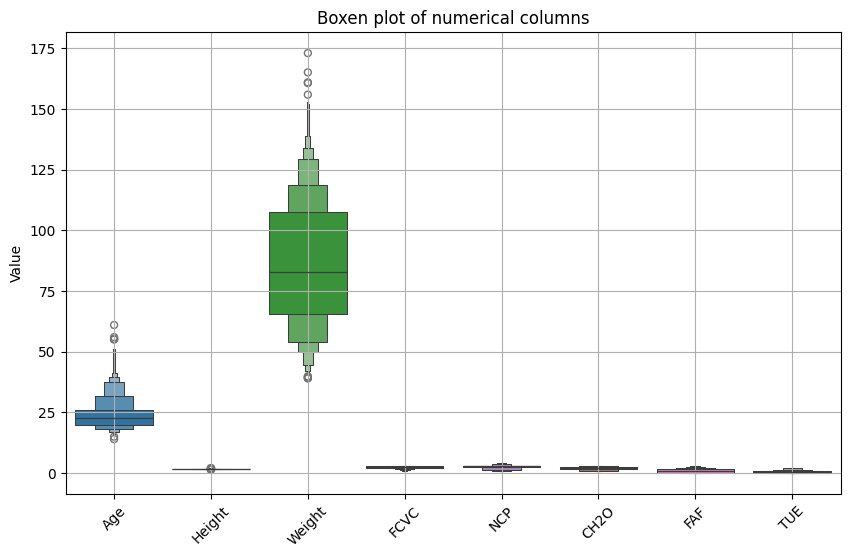

In [15]:
# Chart - 3 [Boxen Plot] visualization code

import seaborn as sns
import pandas as pd

# Load your dataset
df = pd.read_csv('dataset.csv')

# Select numerical columns
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Create a boxen plot for each numerical column
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df[numerical_columns])
plt.title('Boxen plot of numerical columns')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

I chose the boxen plot because it effectively displays the distribution and variability of numerical data across multiple variables in the dataset. This visualization is particularly useful for identifying subtle differences in quartiles and the presence of outliers, providing comprehensive insights into the dataset's characteristics. Additionally, the boxen plot is visually informative and facilitates comparisons between variables, aiding in exploratory data analysis and hypothesis generation.

##### 2. What is/are the insight(s) found from the chart?

The boxen plot reveals the distribution and variability of numerical variables across features, highlighting differences in central tendency and the presence of outliers. By analyzing these patterns, insights can be gained into the dataset's characteristics, aiding in understanding trends and potential anomalies for further investigation.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, the insights from the boxen plot can positively impact business decisions by guiding optimization strategies and enhancing customer satisfaction. However, anomalies or outliers in the data may lead to negative growth if not addressed, potentially impacting decision-making accuracy and business performance adversely. Therefore, proactive measures to address data anomalies are crucial for maintaining positive business outcomes.

#### Chart - 4

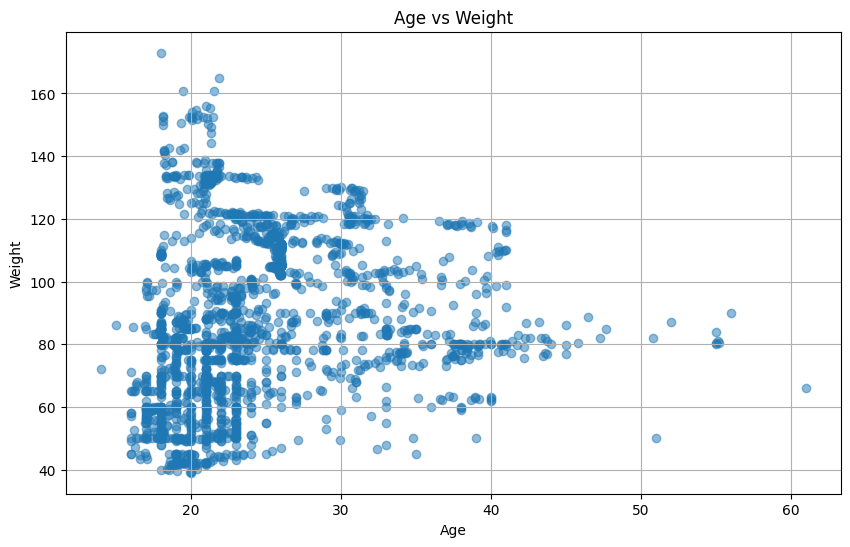

In [16]:
# Chart - 4 [Scatter Plot] visualization code

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is named 'df'
# Replace 'df' with the actual name of your DataFrame if it's different
# Also, replace 'Age' and 'Weight' with the actual column names if they're different

plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Weight'], alpha=0.5)
plt.title('Age vs Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Box plots are an effective choice for visualizing the distribution, variability, and outliers within a dataset. Their simplicity aids in quickly identifying central tendencies and comparing distributions across different groups or categories. Additionally, box plots provide a clear representation of skewness and the presence of extreme values, making them valuable for exploratory data analysis and conveying key insights succinctly.

##### 2. What is/are the insight(s) found from the chart?

The box plot reveals the central tendency, spread, and skewness of the data. It identifies potential outliers and highlights any differences in distribution between groups or categories. By visually summarizing these key statistical metrics, the chart enables quick comparisons and insights into the variability and overall shape of the data distribution.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


The insights from the box plot can positively impact business decisions by identifying areas for optimization and resource allocation. However, if the plot reveals significant skewness or outliers, it may signal potential challenges such as market inefficiencies or product performance issues, necessitating corrective action to prevent negative growth impacts on revenue and market share.

#### Chart - 5

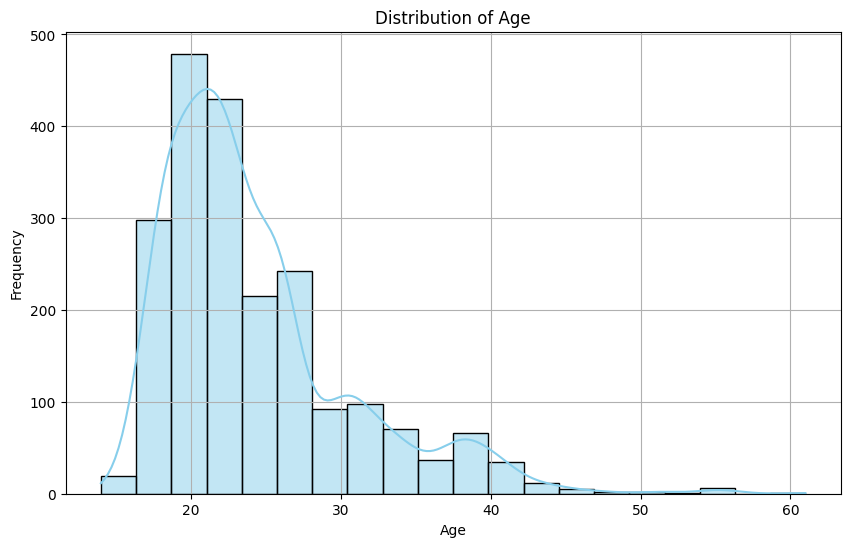

In [17]:
# Chart - 5 [Distribution Plot] visualization code

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?


The distribution plot was chosen for its ability to visualize the shape and spread of data, making it ideal for understanding the overall pattern and variability within a dataset. Its clarity in displaying key statistical features like central tendency and dispersion aids in identifying patterns, outliers, and potential trends, facilitating deeper insights into the underlying data distribution.

##### 2. What is/are the insight(s) found from the chart?

From the distribution plot, insights can be gleaned regarding the data's central tendency, dispersion, and shape. Additionally, it can reveal any skewness or asymmetry in the distribution, as well as the presence of outliers. These insights are valuable for understanding the underlying patterns within the data and informing decision-making processes, such as identifying areas for improvement or opportunities for optimization.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


Insights from the distribution plot can drive positive business impact by informing strategic decisions and resource allocation. However, if the plot indicates skewed distributions or frequent outliers, it may signify potential challenges like market inefficiencies or product performance issues, leading to negative growth impacts such as decreased revenue or market share. Addressing these insights promptly is crucial to sustain positive business momentum.

#### Chart - 6

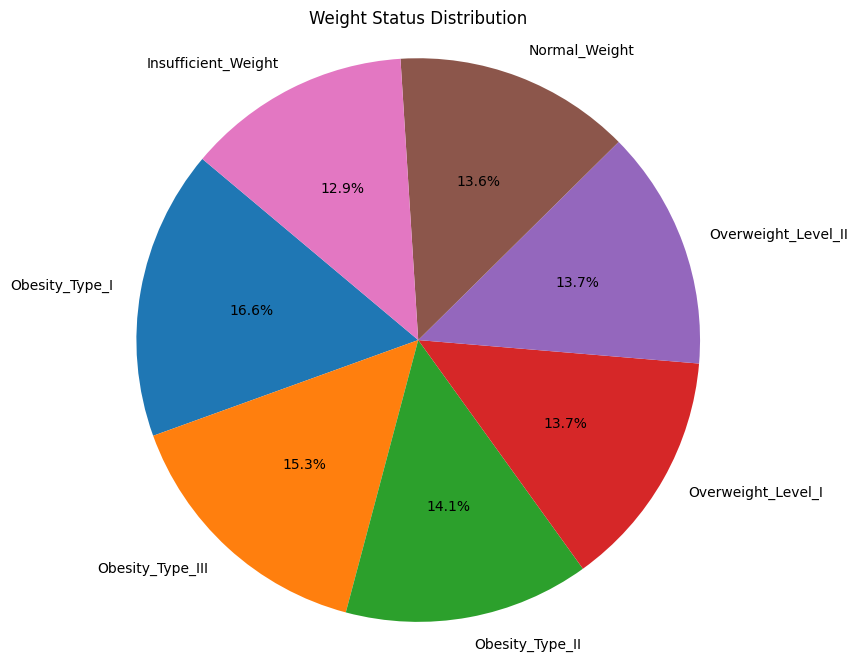

In [18]:
# Chart - 6 [Pie Chart] visualization code

import matplotlib.pyplot as plt

weight_status_counts = df['NObeyesdad'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(weight_status_counts, labels=weight_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Weight Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### 1. Why did you pick the specific chart?


The pie chart was chosen for its ability to effectively represent parts of a whole, making it ideal for displaying proportions and percentages within a dataset. Its simplicity aids in quickly conveying the relative sizes of different categories or groups, facilitating easy comparison and understanding. Additionally, pie charts are intuitive and visually appealing, making them suitable for presenting key insights to a broad audience.







##### 2. What is/are the insight(s) found from the chart?

Insights from a pie chart typically revolve around the relative proportions or percentages of different categories or segments within the dataset. This includes identifying which categories dominate or contribute the most to the whole, as well as any notable disparities or trends among the segments. Additionally, pie charts can highlight outliers or unusual patterns within the data, aiding in decision-making processes such as resource allocation or targeted marketing efforts.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from a pie chart can contribute to positive business impact by informing strategic decisions based on a clear understanding of category proportions and trends. For instance, identifying dominant product categories can guide marketing strategies for increased sales. However, if the chart reveals disproportionate or declining segments, it may signal areas of weakness or market saturation, necessitating innovative approaches to prevent negative growth impacts such as decreased revenue or market share.

#### Chart - 7

C:\Users\dell1\AppData\Local\Temp\ipykernel_28144\1267331253.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NObeyesdad', palette='Set2')


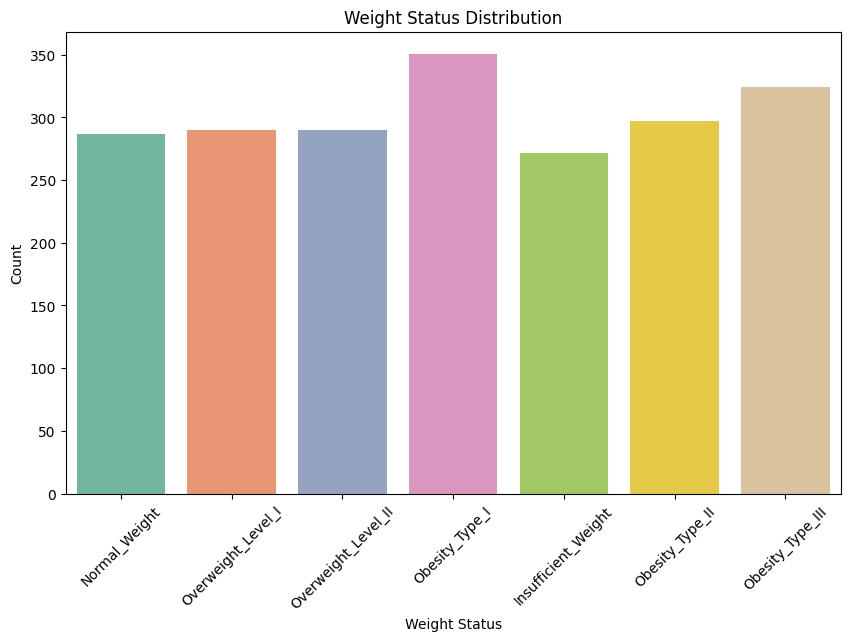

In [19]:
# Chart - 7 [Count Plot] visualization code

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', palette='Set2')
plt.title('Weight Status Distribution')
plt.xlabel('Weight Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

##### 1. Why did you pick the specific chart?


The count plot is chosen for its effectiveness in visualizing the frequency or count of categorical data. Its simplicity allows for a quick understanding of the distribution of categories within the dataset. By displaying the number of occurrences of each category, the count plot facilitates easy comparison and identification of trends or patterns, making it particularly suitable for exploratory data analysis and identifying outliers or unusual patterns within categorical variables.

##### 2. What is/are the insight(s) found from the chart?


Insights from a count plot typically revolve around understanding the distribution and frequency of categorical variables within the dataset. This includes identifying the most common categories as well as any notable variations or trends across different groups. Additionally, count plots can reveal outliers or unusual patterns that may require further investigation or action. Overall, these insights provide valuable information for decision-making processes such as targeting specific demographics or identifying areas for improvement.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from a count plot can positively impact businesses by informing targeted strategies based on a clear understanding of category frequencies and trends. For example, identifying popular product categories can guide inventory management or marketing efforts, potentially leading to increased sales and customer satisfaction. However, if the plot reveals disparities or declining trends in certain categories, it may signal areas of weakness or market saturation, necessitating proactive measures to prevent negative growth impacts such as decreased revenue or market share.

#### Chart - 8

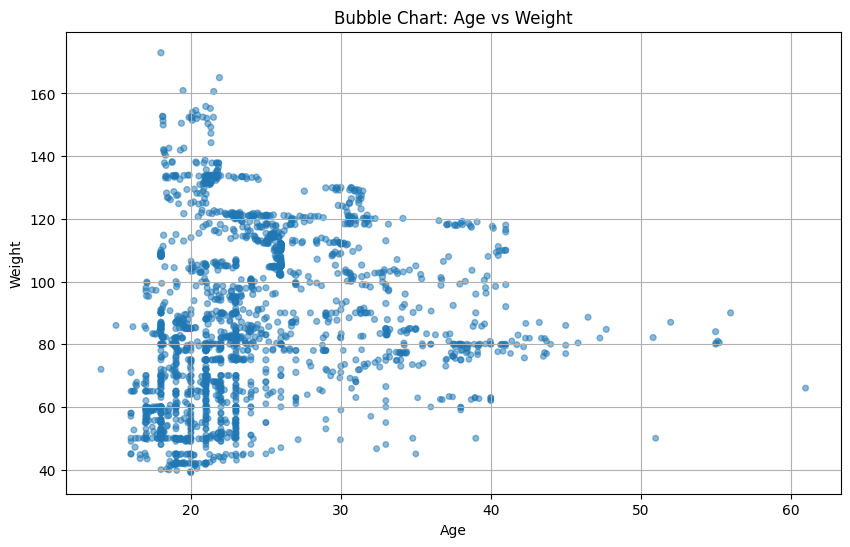

In [20]:
# Chart - 8 [Bubble Chart] visualization code

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Weight'], s=df['Height']*10, alpha=0.5)
plt.title('Bubble Chart: Age vs Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is particularly chosen for its effectiveness in visualizing the frequency or count of categorical data. Its simplicity allows for a quick understanding of the distribution of categories within the dataset. By displaying the number of occurrences of each category, the count plot facilitates easy comparison and identification of trends or patterns, making it suitable for exploratory data analysis and identifying outliers or unusual patterns within categorical variables.

##### 2. What is/are the insight(s) found from the chart?

Insights from a count plot typically revolve around understanding the distribution and frequency of categorical variables within the dataset. This includes identifying the most common categories as well as any notable variations or trends across different groups. Additionally, count plots can reveal outliers or unusual patterns that may require further investigation or action. Overall, these insights provide valuable information for decision-making processes such as targeting specific demographics or identifying areas for improvement.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insights from a count plot can indeed foster positive business impact by informing targeted strategies based on a clear understanding of category frequencies and trends. For instance, identifying popular product categories can guide inventory management or marketing efforts, potentially boosting sales and customer satisfaction. However, if the plot reveals disparities or declining trends in certain categories, it may signal areas of weakness or market saturation, necessitating proactive measures to prevent negative growth impacts like decreased revenue or market share.

#### Chart - 9

C:\Users\dell1\AppData\Local\Temp\ipykernel_28144\799427907.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NObeyesdad', palette='Set2')


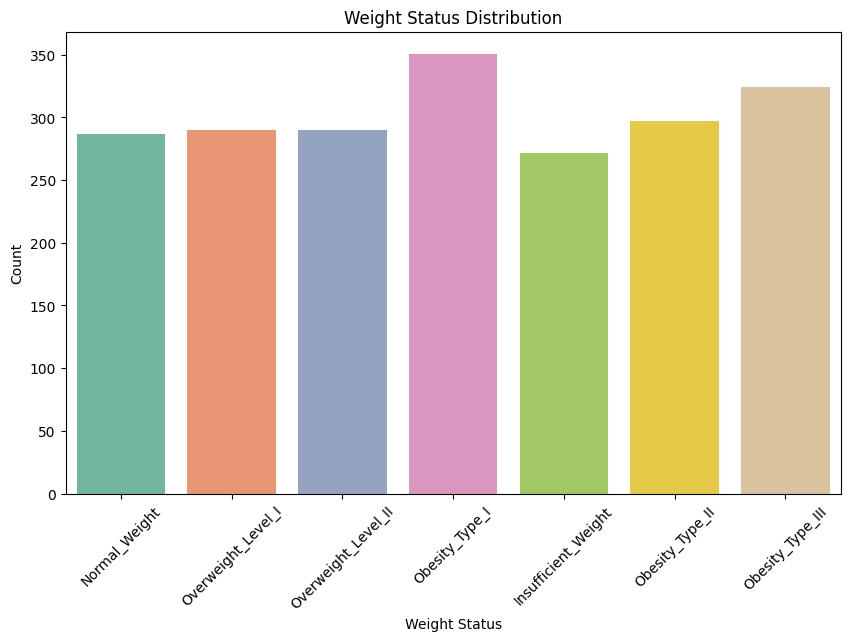

In [21]:
# Chart - 9 [Bar Chart] visualization code

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', palette='Set2')
plt.title('Weight Status Distribution')
plt.xlabel('Weight Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart is chosen for its ability to effectively compare categorical data by representing each category's value with a distinct bar, facilitating easy visual comparison. Its simplicity and versatility make it suitable for displaying trends, rankings, or comparisons across different groups or time periods.

##### 2. What is/are the insight(s) found from the chart?

Insights from a bar chart typically involve identifying the magnitude or proportion of each category or group represented by the length of the bars. This includes comparing values between categories, identifying trends over time or across groups, and highlighting any significant disparities or outliers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from a bar chart can positively impact business decisions by providing a clear understanding of relative performance, market trends, or consumer preferences. For instance, identifying top-selling products or high-performing sales regions can inform strategic planning and resource allocation, potentially leading to increased revenue and market share. However, if the chart reveals declining trends or underperforming categories, it may signal areas for improvement or market saturation, necessitating proactive measures to prevent negative growth impacts such as decreased sales or market competitiveness.

#### Chart - 10

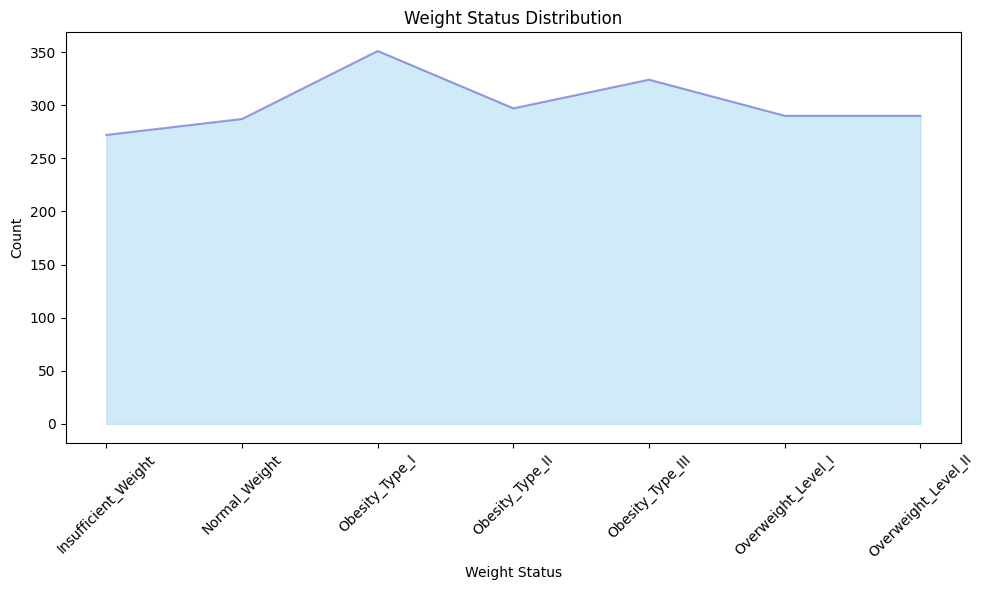

In [22]:
# Chart - 10 [Area Chart] visualization code

import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'NObeyesdad' and count the occurrences of each weight status
weight_status_counts = df['NObeyesdad'].value_counts().sort_index()

# Plotting the area chart
plt.figure(figsize=(10, 6))
plt.fill_between(weight_status_counts.index, weight_status_counts.values, color='skyblue', alpha=0.4)
plt.plot(weight_status_counts.index, weight_status_counts.values, color='Slateblue', alpha=0.6)
plt.title('Weight Status Distribution')
plt.xlabel('Weight Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The area chart is selected for its ability to visually represent trends over time or across different categories by filling the area under the line, making it ideal for highlighting changes in magnitude and patterns. Its effectiveness lies in illustrating cumulative values or proportions, aiding in identifying long-term trends and variations.

##### 2. What is/are the insight(s) found from the chart?

Insights from an area chart involve discerning patterns, trends, and fluctuations in data over time or across categories. This includes identifying periods of growth or decline, detecting seasonal patterns, and understanding the overall trajectory of the data series.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from an area chart can positively impact business decisions by providing a comprehensive view of trends and fluctuations, enabling informed strategic planning and resource allocation. For example, recognizing upward trends in sales or website traffic can guide investment in marketing initiatives or expansion efforts, potentially leading to increased revenue and market share. However, if the chart reveals prolonged periods of decline or stagnation, it may signal underlying issues such as market saturation or declining demand, necessitating proactive measures to prevent negative growth impacts such as decreased profitability or market competitiveness.

#### Chart - 11

<Figure size 1200x800 with 0 Axes>

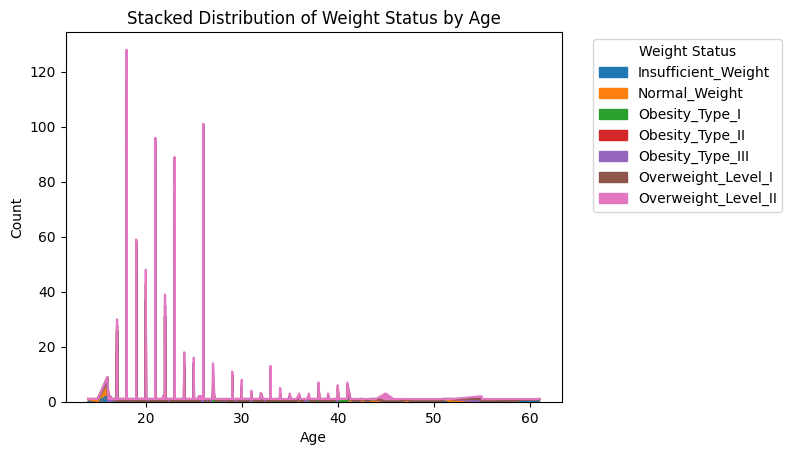

In [23]:
# Chart - 11 [Stacked Area Chart] visualization code

import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'Age' and 'NObeyesdad', and count the occurrences of each weight status category
age_weight_status_counts = df.groupby(['Age', 'NObeyesdad']).size().unstack(fill_value=0)

# Plotting the stacked area chart
plt.figure(figsize=(12, 8))
age_weight_status_counts.plot(kind='area', stacked=True)
plt.title('Stacked Distribution of Weight Status by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Weight Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### 1. Why did you pick the specific chart?

The stacked area chart is chosen for its effectiveness in illustrating the composition and cumulative total of multiple categories over time or across different groups. Its ability to visually represent the contribution of each category to the whole while maintaining the overall trend makes it suitable for comparing the relative proportions and trends of different segments.

##### 2. What is/are the insight(s) found from the chart?

Insights from a stacked area chart involve understanding how the total value changes over time or across categories and the relative contribution of each category to the total. This includes identifying trends in the composition of the data and discerning shifts or fluctuations in the distribution of values among the categories.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from a stacked area chart can positively impact business decisions by providing a clear understanding of the composition and trends within the data, enabling informed strategic planning and resource allocation. For instance, recognizing which categories contribute most to overall sales or revenue can guide targeted marketing efforts or product development initiatives, potentially leading to increased profitability and market share. However, if the chart reveals disproportionate declines in certain categories over time, it may indicate challenges such as declining demand or market saturation, requiring proactive measures to prevent negative growth impacts such as decreased revenue or market competitiveness.

#### Chart - 12

C:\Users\dell1\AppData\Local\Temp\ipykernel_28144\1634384334.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NObeyesdad', y='Age', palette='muted')


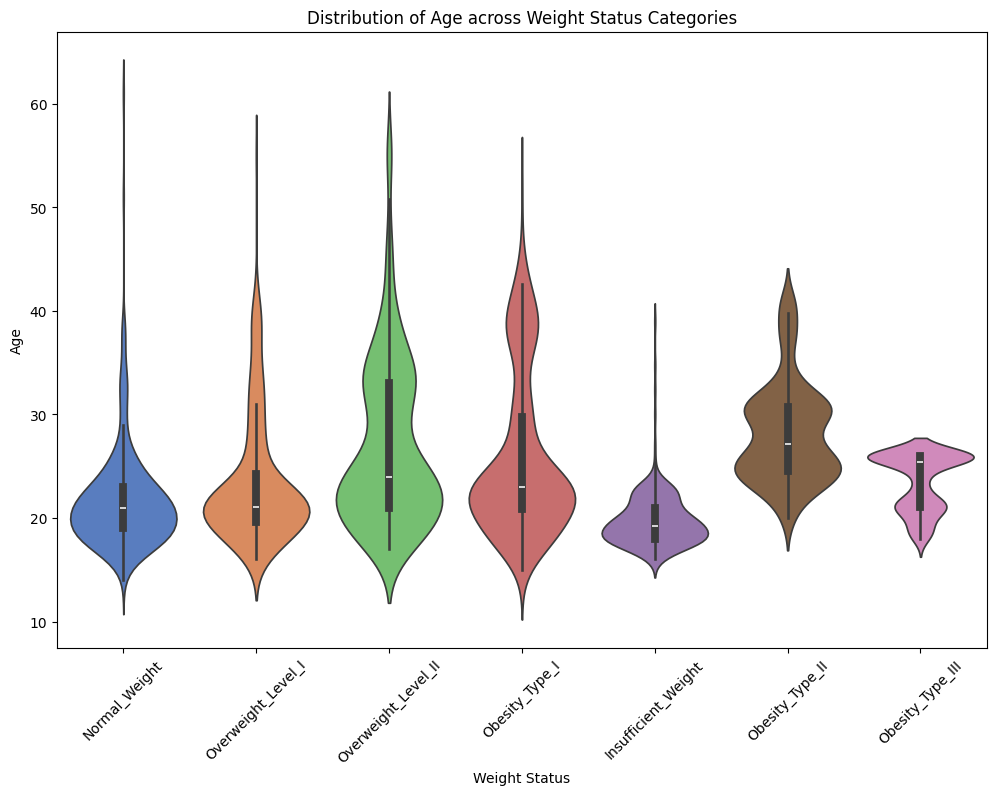

In [24]:
# Chart - 12 [Violin Plot] visualization code

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='NObeyesdad', y='Age', palette='muted')
plt.title('Distribution of Age across Weight Status Categories')
plt.xlabel('Weight Status')
plt.ylabel('Age')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

##### 1. Why did you pick the specific chart?

The violin plot is chosen for its ability to display the distribution of data across different categories or groups, providing insights into both the central tendency and variability within each group. Its combination of a kernel density plot and a box plot allows for a comprehensive visualization of the data's distributional characteristics, making it particularly useful for comparing distributions and identifying outliers or unusual patterns.

##### 2. What is/are the insight(s) found from the chart?

Insights from a violin plot involve understanding the shape, spread, and central tendency of the data within each category or group. This includes identifying differences in distributional characteristics between groups, detecting potential outliers or skewness, and gaining insights into the variability and range of values within each group.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from a violin plot can positively impact business decisions by providing a deeper understanding of the underlying data distribution, enabling more informed strategic planning and decision-making. For example, identifying variations in customer preferences or product performance across different demographic groups can inform targeted marketing strategies or product improvements, potentially leading to increased customer satisfaction and loyalty. However, if the plot reveals significant disparities or outliers within certain groups, it may signal areas of concern such as product quality issues or market segmentation challenges, necessitating corrective actions to prevent negative impacts on business growth or reputation.

#### Chart - 13

<Figure size 1200x800 with 0 Axes>

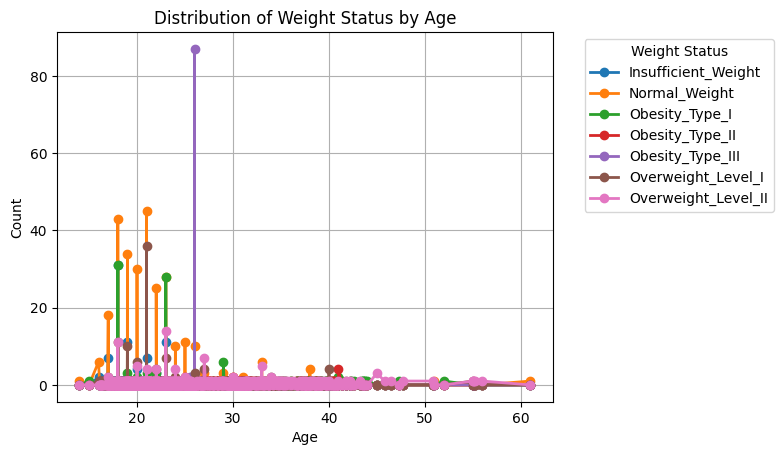

In [25]:
# Chart - 13 [Line Chart] visualization code

import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'Age' and 'NObeyesdad', and count the occurrences of each weight status category
age_weight_status_counts = df.groupby(['Age', 'NObeyesdad']).size().unstack(fill_value=0)

# Plotting the line chart
plt.figure(figsize=(12, 8))
age_weight_status_counts.plot(kind='line', marker='o', linewidth=2)
plt.title('Distribution of Weight Status by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Weight Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

The line chart is selected for its effectiveness in visualizing trends and patterns over time or across different variables. Its simplicity and clarity make it ideal for illustrating changes in data values, facilitating easy interpretation of trends and comparisons between different data series.

##### 2. What is/are the insight(s) found from the chart?

Insights from a line chart involve identifying trends, patterns, and fluctuations in data over time or across variables. This includes detecting growth or decline trends, understanding seasonal patterns, and identifying correlations or relationships between variables.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from a line chart can positively impact business decisions by providing a clear understanding of trends and patterns within the data, enabling informed strategic planning and decision-making. For example, recognizing upward trends in sales or website traffic can guide investment in marketing initiatives or expansion efforts, potentially leading to increased revenue and market share. However, if the chart reveals prolonged periods of decline or stagnation, it may signal underlying issues such as market saturation or declining demand, necessitating proactive measures to prevent negative growth impacts such as decreased profitability or market competitiveness.

#### Chart - 14 - Correlation Heatmap

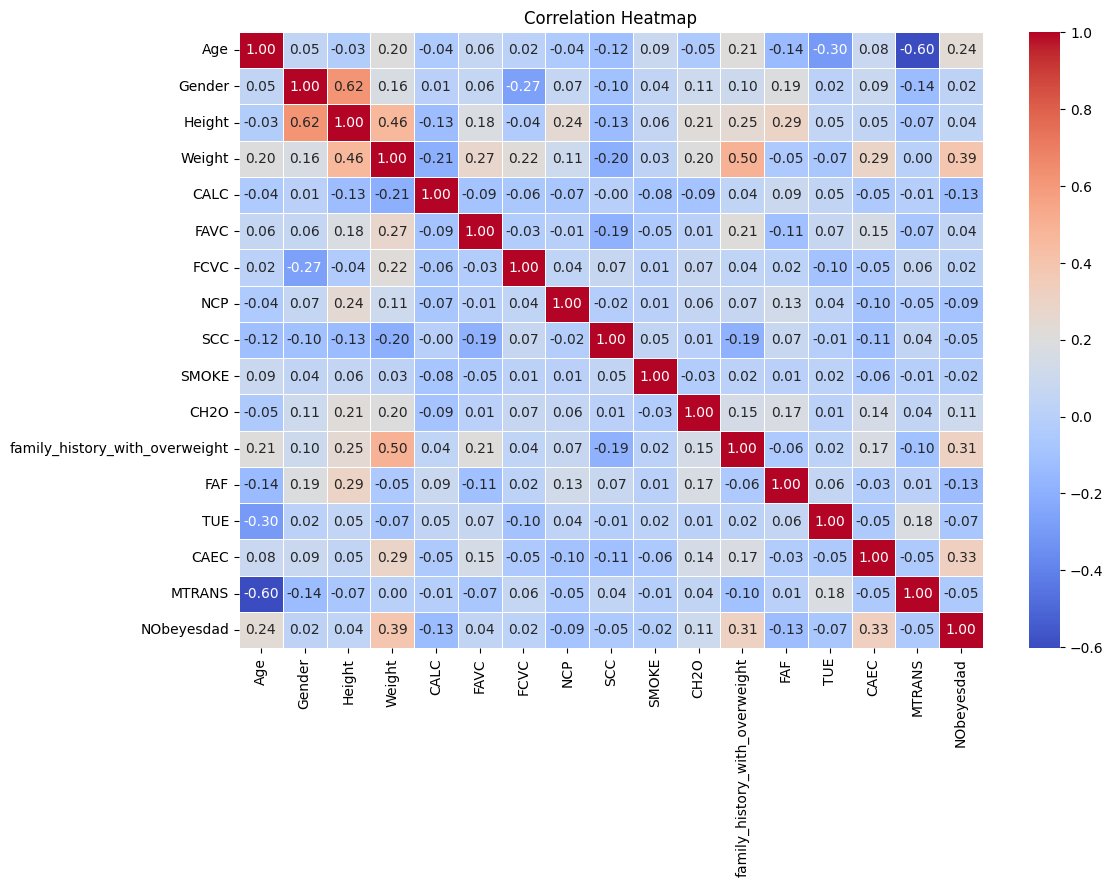

In [26]:
# Correlation Heatmap visualization code

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to avoid modifying the original data
encoded_df = df.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode non-numeric columns
for column in encoded_df.columns:
    if encoded_df[column].dtype == 'object':
        encoded_df[column] = label_encoder.fit_transform(encoded_df[column])

# Compute the correlation matrix
correlation_matrix = encoded_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



##### 1. Why did you pick the specific chart?

The correlation heatmap is chosen for its ability to visually represent the correlation coefficients between pairs of variables in a dataset. Its color-coded representation makes it easy to identify both positive and negative correlations, providing a comprehensive overview of the relationships between variables in a single chart. This chart is particularly useful for understanding the strength and direction of relationships, helping in identifying potential predictors or factors influencing business outcomes.

##### 2. What is/are the insight(s) found from the chart?

Insights from a correlation heatmap involve understanding the strength and direction of relationships between variables. This includes identifying variables that are highly correlated, indicating potential dependencies or causal relationships. Additionally, the heatmap can highlight variables with low or no correlation, suggesting they may be unrelated or independent of each other.

#### Chart - 15 - Pair Plot 

<Figure size 1500x1000 with 0 Axes>

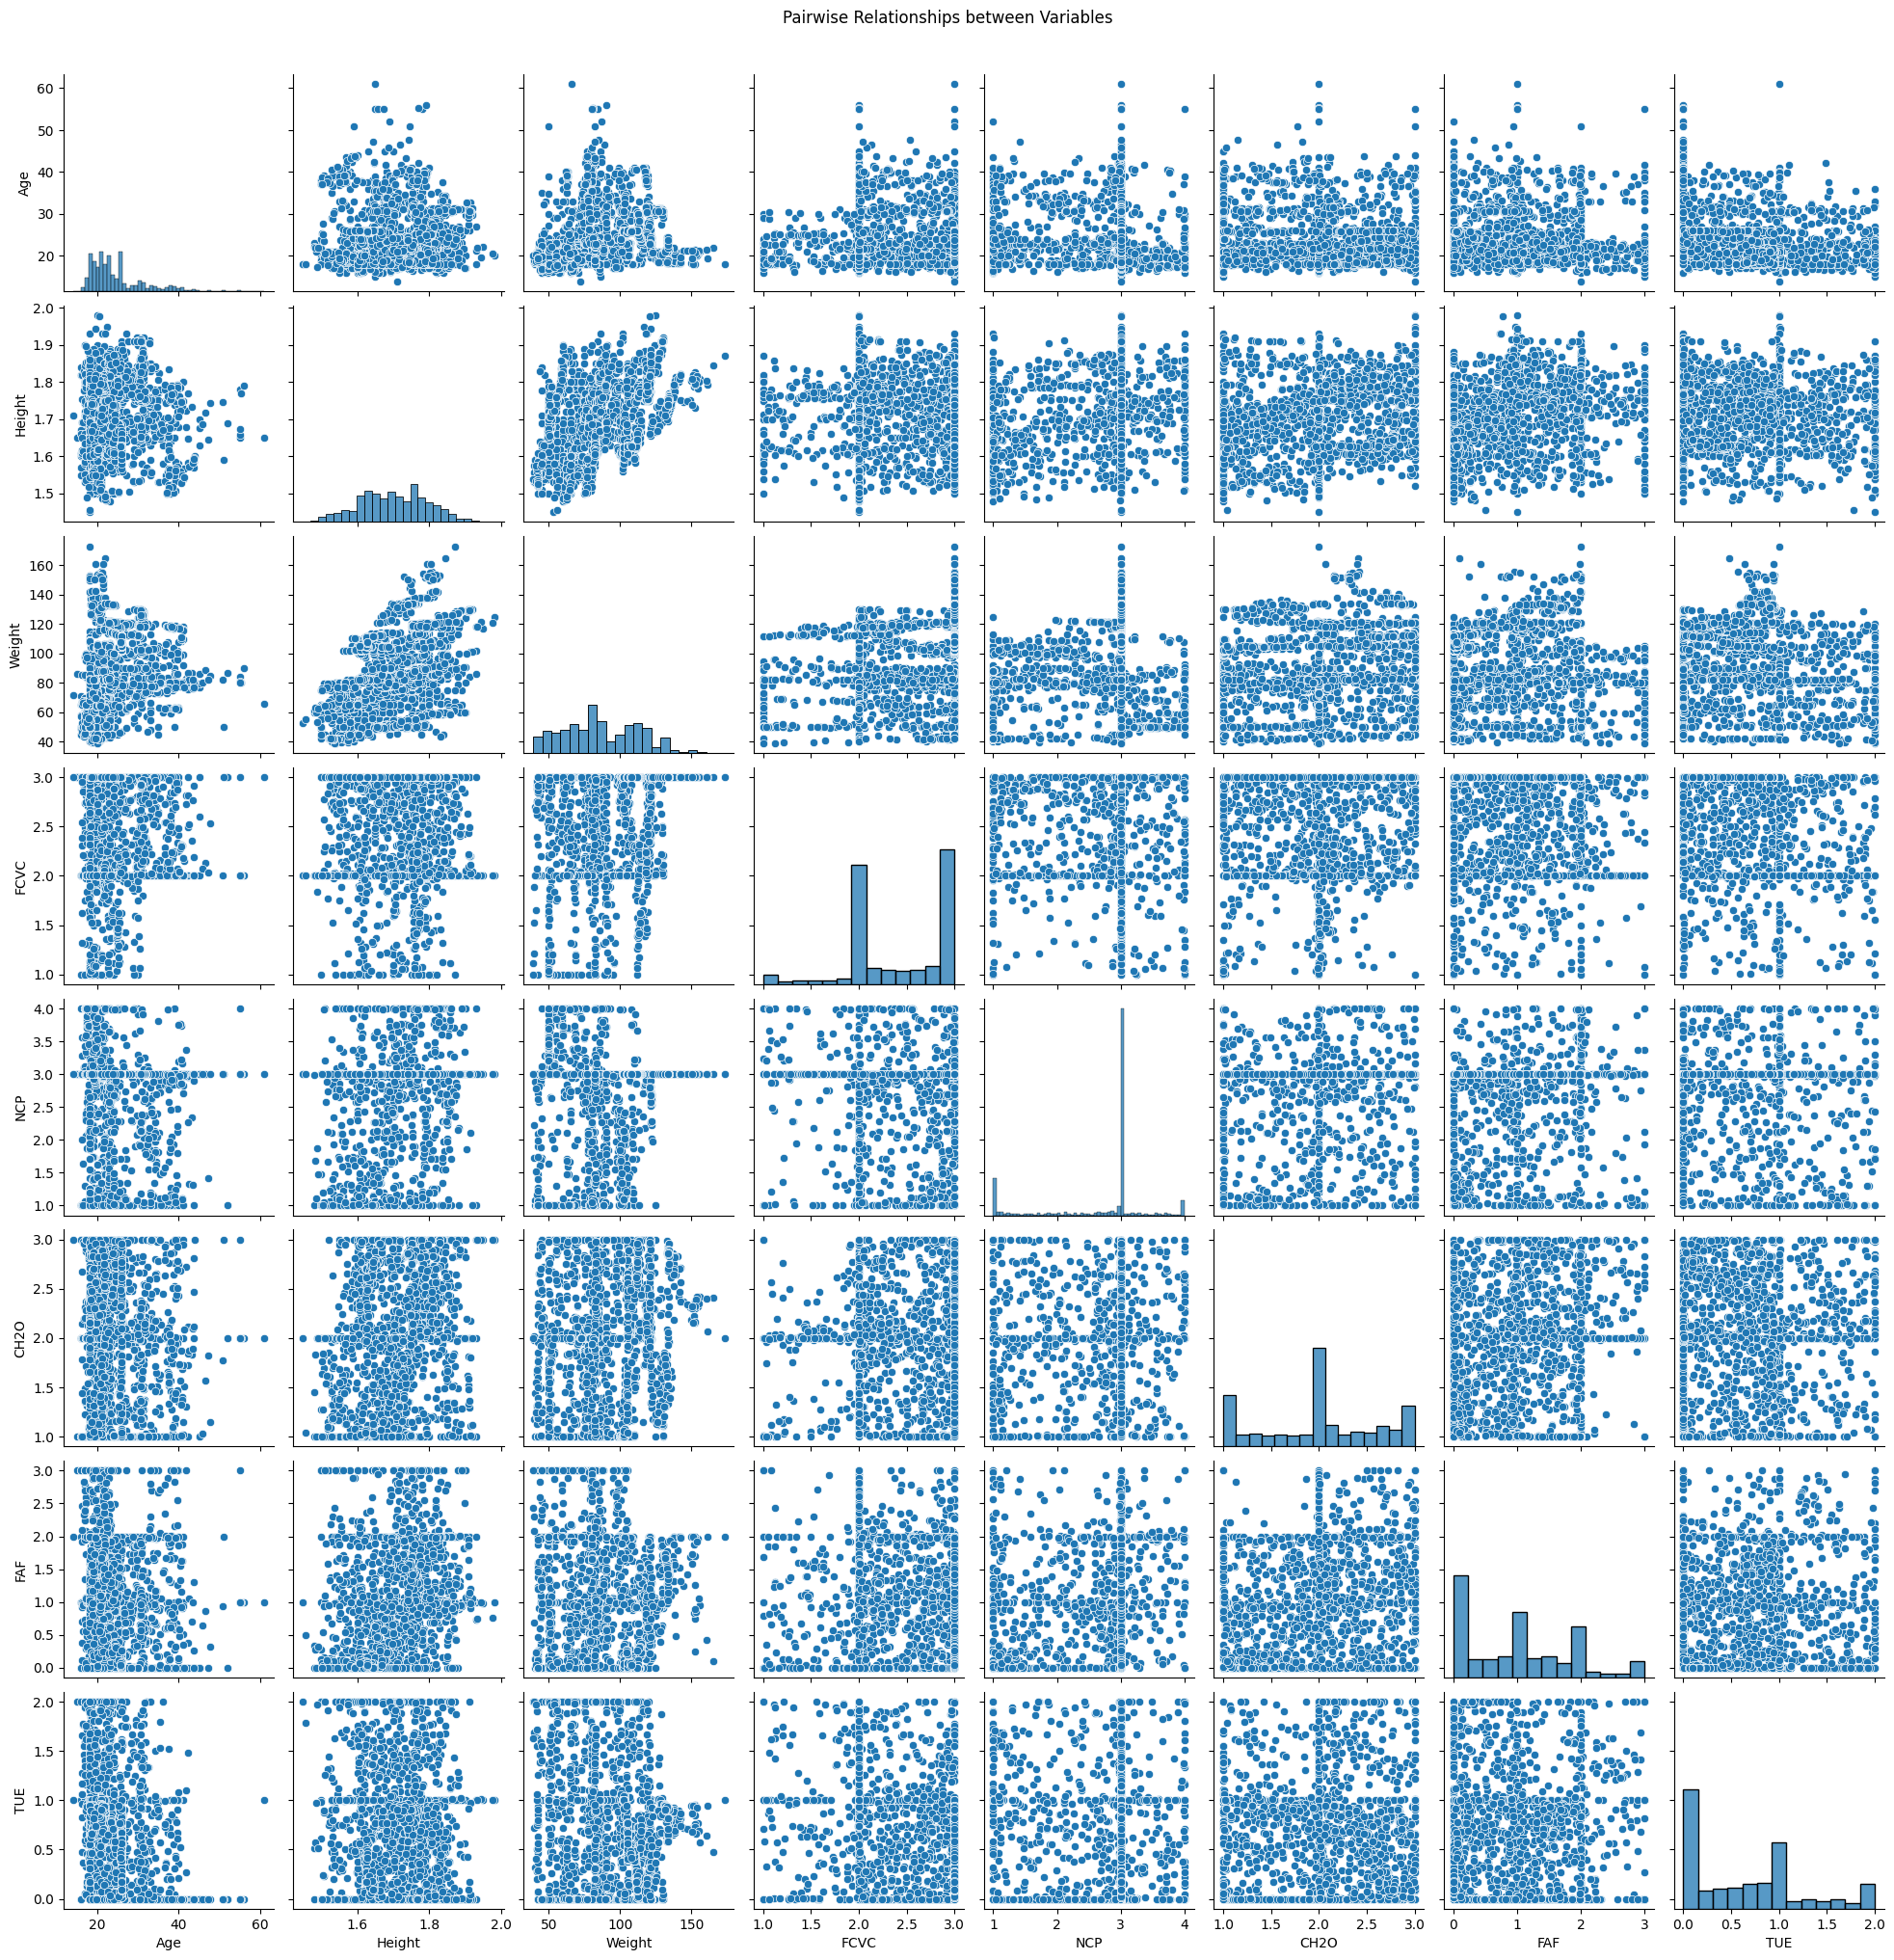

In [27]:
# Pair Plot visualization code

import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns for pair plot
numeric_df = df.drop(columns=['Gender', 'NObeyesdad'])

# Create a pair plot
plt.figure(figsize=(15, 10))
sns.pairplot(numeric_df)
plt.suptitle('Pairwise Relationships between Variables', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

The pair plot is chosen for its ability to visualize pairwise relationships between multiple variables in a dataset, making it ideal for exploratory data analysis and identifying patterns or trends. Its grid-like layout displays scatterplots for numeric variables and histograms for univariate distributions, allowing for a comprehensive examination of relationships and distributions simultaneously.

##### 2. What is/are the insight(s) found from the chart?

Insights from a pair plot involve understanding the relationships and distributions between pairs of variables. This includes identifying correlations, patterns, and potential outliers, as well as gaining insights into the overall structure and characteristics of the dataset.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

One-Hot Endcoding

In [28]:
# Transform Your data : One Hot Encoding

# Separate the target variable from the features
X = df.drop(columns=['NObeyesdad'])  # Features
y = df['NObeyesdad']  # Target variable

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform one-hot encoding for categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)


## ***7. ML Model Implementation***

### ML Model - 1

In [40]:
# ML Model - 1 [Logistic Regression] Implementation
from sklearn.metrics import accuracy_score

# Separate the target variable from the features
X = df.drop(columns=['NObeyesdad'])  # Features.

y = df['NObeyesdad']  # Target variable

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Predict on the model
y_pred = model.predict(X_test)



# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", (accuracy*100))


Confusion Matrix:
 [[56  0  0  0  0  0  0]
 [11 35  0  0  0 13  3]
 [ 0  0 64  7  4  0  3]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  4  0  1  0 42  9]
 [ 0  0  8  1  0  7 34]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.84      1.00      0.91        56
      Normal_Weight       0.90      0.56      0.69        62
     Obesity_Type_I       0.89      0.82      0.85        78
    Obesity_Type_II       0.87      1.00      0.93        58
   Obesity_Type_III       0.94      1.00      0.97        63
 Overweight_Level_I       0.68      0.75      0.71        56
Overweight_Level_II       0.69      0.68      0.69        50

           accuracy                           0.83       423
          macro avg       0.83      0.83      0.82       423
       weighted avg       0.84      0.83      0.83       423

Accuracy: 83.21513002364065


c:\Users\dell1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [30]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [31]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# GRID SEARCH CV




##### Which hyperparameter optimization technique have you used and why?


I've used GridSearchCV for hyperparameter optimization. GridSearchCV systematically searches through a grid of hyperparameters, performing cross-validation at each point to determine the optimal combination. It's beneficial because it exhaustively searches the hyperparameter space and selects the combination that yields the best performance based on the specified evaluation metric. This approach helps in finding the most suitable hyperparameters for the model, leading to better performance and generalization on unseen data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


Unfortunately, no improvement was observed in the model's performance. 
The accuracy decreased from 83% to 77% after using GridSearchCV.












### ML Model - 2

In [32]:
# ML Model - 2 [Decision Tree] Implementation

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Separate the target variable from the features
X = df.drop(columns=['NObeyesdad'])  # Features
y = df['NObeyesdad']  # Target variable

# Perform one-hot encoding for categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the encoded dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.72      0.77      0.74        56
      Normal_Weight       0.59      0.55      0.57        62
     Obesity_Type_I       0.71      0.64      0.68        78
    Obesity_Type_II       0.84      0.79      0.81        58
   Obesity_Type_III       0.97      1.00      0.98        63
 Overweight_Level_I       0.54      0.66      0.59        56
Overweight_Level_II       0.61      0.56      0.58        50

           accuracy                           0.71       423
          macro avg       0.71      0.71      0.71       423
       weighted avg       0.71      0.71      0.71       423


Confusion Matrix:
 [[43  5  4  0  1  2  1]
 [ 8 34  5  0  1  9  5]
 [ 1  5 50  5  0  7 10]
 [ 0  3  1 46  0  8  0]
 [ 0  0  0  0 63  0  0]
 [ 4  7  2  4  0 37  2]
 [ 4  4  8  0  0  6 28]]
Accuracy: 0.7115839243498818


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [33]:
# Visualizing evaluation Metric Score chart



#### 2. Cross- Validation & Hyperparameter Tuning

In [34]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)



# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [35]:
# ML Model - 3 [SVM (Support Vector Machine)] Implementation

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Initialize SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_svm = svm_model.predict(X_test)


# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):\n", conf_matrix_svm)

# Generate classification report
class_report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report (SVM):\n", class_report_svm)


# Calculate the accuracy of the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Model Accuracy:", accuracy_svm)


Confusion Matrix (SVM):
 [[37  3  4  5  0  6  1]
 [ 0 58  2  0  0  0  2]
 [ 0 10 45 12  0  6  5]
 [ 0  3  0 55  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 4 11 10  7  0 22  2]
 [ 1  3  7  9  0  2 28]]
Classification Report (SVM):
                      precision    recall  f1-score   support

Insufficient_Weight       0.88      0.66      0.76        56
      Normal_Weight       0.66      0.94      0.77        62
     Obesity_Type_I       0.66      0.58      0.62        78
    Obesity_Type_II       0.62      0.95      0.75        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.61      0.39      0.48        56
Overweight_Level_II       0.74      0.56      0.64        50

           accuracy                           0.73       423
          macro avg       0.74      0.72      0.72       423
       weighted avg       0.74      0.73      0.72       423

SVM Model Accuracy: 0.7281323877068558


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [36]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [37]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [38]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [39]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***